In [0]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline 
#import the required Modules
import warnings
warnings.filterwarnings('ignore')
# Data visualization
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
!nvidia-smi

Sun Jun 14 18:26:14 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P0    57W / 149W |    694MiB / 11441MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
datapath = '/content/drive/My Drive/MachineHack_8_PartsData/'

In [0]:
filename1 = 'Train.csv'
filename2 = 'Test.csv'
filename3 = 'Sample_Submission.xlsx'
sep = ','
train = pd.read_csv(datapath+filename1,index_col=None,sep=sep,parse_dates=['Date'])
test = pd.read_csv(datapath+filename2,index_col=None,sep=sep,parse_dates=['Date'])
final_submission = pd.read_excel(datapath+filename3,index_col=None)
print(train.shape)
print(test.shape)
print(final_submission.shape)

(2452, 8)
(1051, 7)
(1051, 1)


In [0]:
train.head()

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date,Selling_Price
0,P-2610,B-659,bags wallets belts,bags,hand bags,4.3,2017-02-03,291.0
1,P-2453,B-3078,clothing,women s clothing,western wear,3.1,2015-07-01,897.0
2,P-6802,B-1810,home decor festive needs,showpieces,ethnic,3.5,2019-01-12,792.0
3,P-4452,B-3078,beauty and personal care,eye care,h2o plus eye care,4.0,2014-12-12,837.0
4,P-8454,B-3078,clothing,men s clothing,t shirts,4.3,2013-12-12,470.0


In [0]:
train['Item_Rating'] = train.Item_Rating.astype('object')
test['Item_Rating'] = test.Item_Rating.astype('object')

In [0]:
!pip install shap
!pip install catboost
!pip install xgboost
!pip install autoviml 

In [0]:
from autoviml.Auto_ViML import Auto_ViML

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

Imported Auto_NLP version: 0.0.38.. Call using:
     train_nlp, test_nlp, nlp_pipeline, predictions = Auto_NLP(
                nlp_column, train, test, target, score_type='balanced_accuracy',
                modeltype='Classification',top_num_features=200, verbose=0,
                build_model=True)
Imported Auto_ViML version: 0.1.653. Call using:
             m, feats, trainm, testm = Auto_ViML(train, target, test,
                            sample_submission='',
                            scoring_parameter='', KMeans_Featurizer=False,
                            hyper_param='RS',feature_reduction=True,
                             Boosting_Flag='CatBoost', Binning_Flag=False,
                            Add_Poly=0, Stacking_Flag=False,Imbalanced_Flag=False,
                            verbose=1)
            
To remove previous versions, perform 'pip uninstall autoviml'
To get the latest version, perform "pip install autoviml --no-cache-dir --ignore-installed"


In [0]:
target='Selling_Price'

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Product        2452 non-null   object        
 1   Product_Brand  2452 non-null   object        
 2   Item_Category  2452 non-null   object        
 3   Subcategory_1  2452 non-null   object        
 4   Subcategory_2  2452 non-null   object        
 5   Item_Rating    2452 non-null   object        
 6   Date           2452 non-null   datetime64[ns]
 7   Selling_Price  2452 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 153.4+ KB


##############  D A T A   S E T  A N A L Y S I S  #######################
Training Set Shape = (2452, 8)
    Training Set Memory Usage = 0.15 MB
Test Set Shape = (1051, 7)
    Test Set Memory Usage = 0.06 MB
Single_Label Target: ['Selling_Price']
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  6
    Number of NLP String Columns =  0
    Number of Date Time Columns =  1
    Number of ID Columns =  0
    Number of Columns to Delete =  0
Printing first 30 columns by each type of column:
    Numeric Columns: []
    Integer-Categorical Columns: []
    String-Categorical Columns: []
    Factor-Categorical Columns: []
    String-Boo

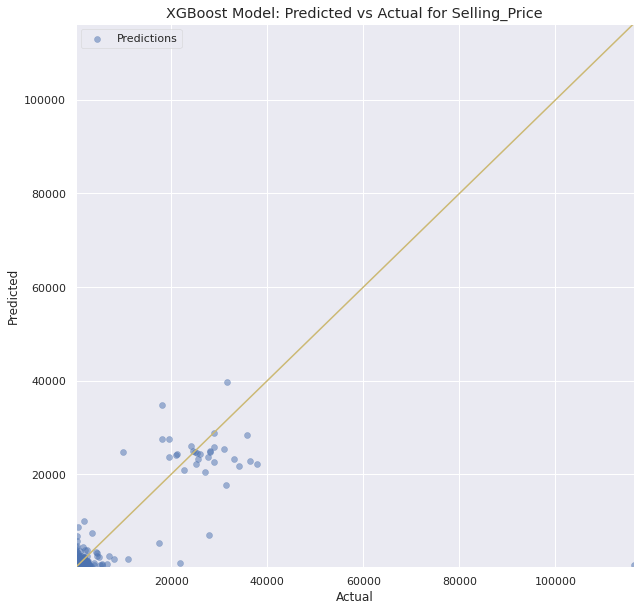

    MAE = 1274.6217
    MAPE = 88%
    RMSE = 5887.1105
    MAE as % std dev of Actuals = 15.3%
    Normalized RMSE (% of MinMax of Actuals) = 5%
    Normalized RMSE (% of Std Dev of Actuals) = 71%
################# E N S E M B L E  M O D E L  ##################
Time taken = 3 seconds
Based on trying multiple models, Best type of algorithm for this data set is Decision_Tree
    Displaying results of weighted average ensemble of 5 regressors
#############################################################################


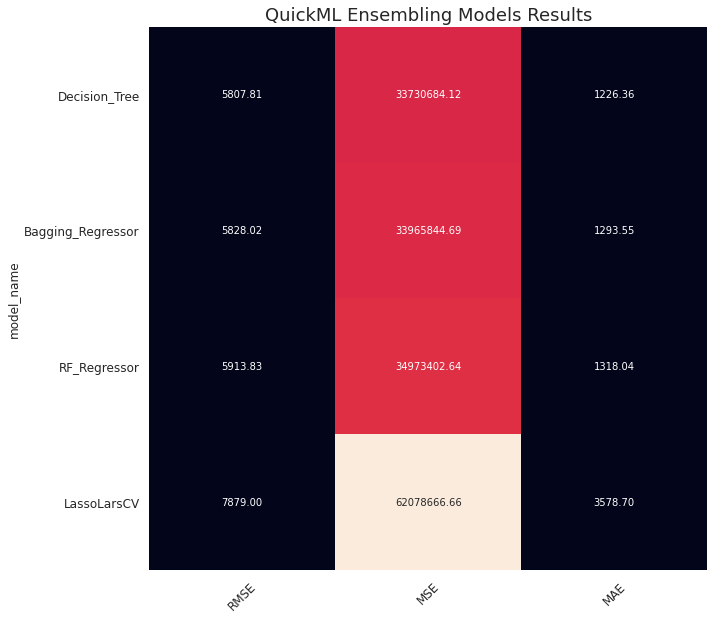

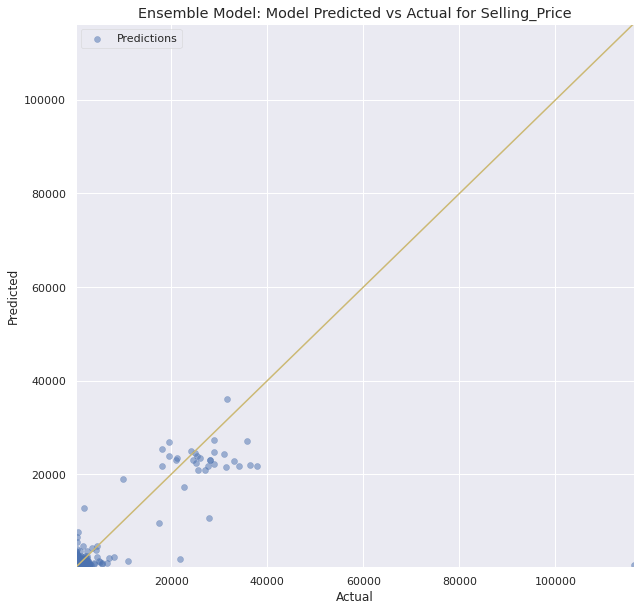

    MAE = 1317.1334
    MAPE = 121%
    RMSE = 5764.3469
    MAE as % std dev of Actuals = 15.8%
    Normalized RMSE (% of MinMax of Actuals) = 5%
    Normalized RMSE (% of Std Dev of Actuals) = 69%
After multiple models, Ensemble Model Results:
    RMSE Score = 5887.11051
#############################################################################
Single Model is better than Ensembling Models for this data set.


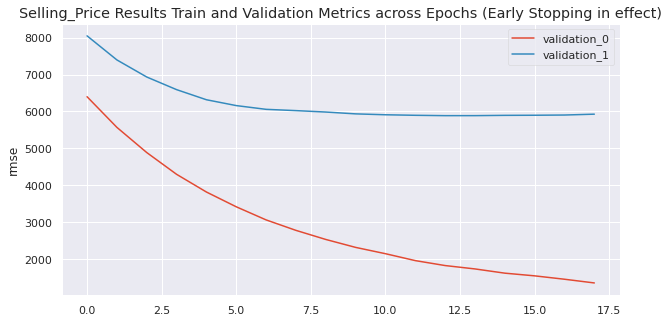

    Time taken for this Target (in seconds) = 81
Training model on complete Train data and Predicting using give Test Data...
    Binning_Flag set to False or there are no numeric vars in data set to be binned
Feature scaling for total 11 float and integer variables completed using MinMaxScaler()...
Actual Training time taken in seconds = 4
    Calculating weighted average ensemble of 5 regressors
Completed Ensemble predictions on held out data
Plotting Feature Importances to explain the output of model
Trying to plot SHAP values if SHAP is installed in this machine...


In [0]:
model11, features, trainm, testm = Auto_ViML(train, target, test, sample_submission='',
                                    scoring_parameter='rmse',KMeans_Featurizer=False,
                                    hyper_param='RS',feature_reduction=True,
                                    Boosting_Flag=True,Binning_Flag=True,
                                    Add_Poly=0, Stacking_Flag=False, 
                                    Imbalanced_Flag=False, 
                                    verbose=2)

In [0]:
abc = pd.read_csv('/content/Selling_Price/Selling_Price_Regression_submission.csv')

In [0]:
abc.head()

,Selling_Price_predictions
0,"1,599.86"
1,"1,192.49"
2,"1,130.62"
3,968.90
4,"1,128.49"


In [0]:
final_submission.head()

In [0]:
final_submission.info()

In [0]:
abc['Selling_Price_predictions'] = abc.Selling_Price_predictions.astype('float64')

In [0]:
final_submission['Selling_Price'] = abc['Selling_Price_predictions']

In [0]:
final_submission.to_excel(datapath+'AutoCat.xlsx',index=False)

In [0]:
#!rm -rf sample_data

In [0]:
#!rm -rf catboost_info/